<h1> <a href=http://www.datascience-paris-saclay.fr/>Paris Saclay Center for Data Science</a> </h1>

<h2> RAMP on charged particle tracking in 2D with a possible future LHC Silicon detector </h2>

<i> Thomas Boser (CHALEARN), Isabelle Guyon (LRI UPSud/INRIA), Mikhail Hushchyn (YSDA/Russia), Balázs Kégl (LAL/Orsay), David Rousseau (LAL/Orsay), Yetkin Yılmaz (LAL/Orsay) </i>

<h2> Introduction </h2>

Tracking is one of the most important tasks in a high-energy physics experiment, as it provides high-precision position and momentum information belonging to charged particles. Such information is crucial for a diverse variety of physics studies - from Standard Model tests to new particle searches - which requires robust low-level optimization without information loss which can be further refined for a narrower and more specific physics context.

Through the history of high-energy physics, there have been many different types of tracking detectors with very different design principles: from bubble chambers to time-projection chambers, from proportional counters to spark chambers... Although each of these have provided a different data topology, they all relied on simple basics: the small energy deposit of particles in well-defined locations, with particles bending in an externally applied magnetic field.

In this challenge, we focus on the topology of silicon detectors in which there are few locations along the polar axis, however a very high precision along the azimuth. Such topology helps to reduce the tracking problem to layer-by-layer azimuth determination, however, we hope to open room for further innovation as well.


<h2> Quick Glossary </h2>

We use the following vocabulary in the context of this challenge. It may be slightly different from the general high-energy physics context. Some terms are not used in the workbook, but kept here in case they are used in the discussions.

**event**: a recorded (or simulated) collision in which many particles are present, the basic unit of particle physics data

**pixel**: the smallest detector unit

**hit**: a pixel through which a particle has passed and left signal in a given event

**cluster**: a set of hits, belonging (or predicted to be belonging) to the trajectory of a single particle

**reconstruct**: same thing as predict, but may also refer to further derived quantities

**track**: a reconstructed particle, that is, a cluster but also including additional derived information, such as the overall curvature and angle

**vertex**: the point close to the center of the detector, from which the particles have originated

**impact parameter**: the shortest distance between a track and the origin

**(momentum/angle/etc) resolution** : width of the normal distribution of the difference between a predicted quantity and the true value of that quantity

<h2> Objectives </h2>

The main objective of the challenge is the optimal matching of the hits in an event. The positions of the hits in the detector are provided as input data, and the user is expected to implement a clustering scheme (trained on data if needed), so that every hit is assigned to a cluster_id.

The value of the cluster_id itself is not relevant for the task, what is relevant is which hits are clustered together, and whether this clustering corresponds well to the input particles. The score function that describes this is included in the notebook, and details will be mentioned there.

<h2> Application </h2>

The user is expected to implement the class *clusterer.py*, which contains the __init__, fit, and predict_single_event functions.

**\__init\__** is where parameters should be set.

**fit** is the training function (not to be confused with track-fitting), where the algorithm has access to the ground-truth. This function is to be run once on an input array that contains a set of training events. The user is able to implement any event-level or particle-level segmentation of the input array in order to set up the training in any desired way.

**predict_single_event** is the function to reconstruct the hit clusters (tracks), returning an array of predicted (reconstructed) ids associated to each hit in the input array. This function takes only the hits from a single event as input, with the event_id dropped, and the RAMP machinery takes care of running this function on each event.

The **task** in the challenge is to implement this class in a way that the predict_single_event function returns a numpy array of assigned cluster_ids. At any level of this task, machine-learning techniques can be employed for sub-tasks defined by the user.

<h2> Detector </h2>

Image from the Atlas Experiment:

<img src="http://atlasexperiment.org/photos/atlas_photos/selected-photos/events/atlas2009-collision-atlantis-141749-405315-hits-web.png" alt="Drawing" style="width: 700px;"/>

The data provided to the user is a list of hit positions from a simple toy detector model that mimics the Atlas detector design (which is generic enough for recent silicon-based tracking detectors). The detector has an onion-like geometry with 9 layers surrounding the origin with polar distances of R = [39,85,155,213,271,405,562,762,1000] cm.
These layers have a very small thickness compared to the distances, therefore the thickness can be neglected.

Each layer is segmented in azimuth with high granularity. There are ($2\pi$R/pitch)+1 pixels in every layer, where pitch is 0.025 cm for layers 0-4 and 0.05 cm for layers 5-9.

Every "pixel" corresponds to the smallest detector unit defined by **layer** and **iphi** (azimuthal index).

<h2> Simulation </h2>

The challenge uses a toy model for particle generation and simulation, in which a Poisson distribution is sampled to determine the number of particles in each event, with an average of 10 particles per event.

The particles are sampled uniformly in azimuth and momentum, with bounds on the momentum. Each particle originates from a vertex that is also randomly sampled from a narrow normal distribution around the origin. The proper dimensions of the momentum and position and determination of these values for the tracks are beyond the scope of the challenge.

The particles generated this way are simulated in a uniform magnetic field. The detector material is considered to cause multiple-scattering, and this is implemented as a random rotation of the particle momentum at every detector position, sampled from a narrow normal distribution that roughly corresponds to the material of the Atlas tracker.

In addition, some hit inefficiency is simulated by a random drop of some hits (with 3% probability), and a particle stopping probability of 1% is applied at each layer to simulate effects of hadronic interactions. Keeping these in mind, the algorithms might be desired to be able to handle cases when the particle doesn't have a hit on every layer.

Since the detector has a very high granularity in azimuth, the cases where two particles pass through a single pixel are neglected (less than 0.2% probability).

<h2> Submission </h2>

Submissions are to be made in the RAMP sandbox:
http://ramp.studio/events/HEP_tracking/sandbox

You can choose to either edit the code here directly, or upload your local version of the clusterer.py. You cannot upload any additional files. All code, (additional classes, functions, or constants etc) must be written inside the clusterer.py.

Don't forget to save and submit. You will make several submissions, make sure they are named in a later recognizable way.

Submission are run on a private set of events, different from the one provided, hence slightly different score is expected. You’re supposed to develop your software on your own laptop/platform and infrequently submit to RAMP platform (once you submitted on RAMP you have to wait 15 min before the next submission). Your submission will run in the backend within a few hours, and you will be able to see the score on the larger sample.

It is very <b><span style="color:red">important that you test your submission files before submitting them</span></b>, for this, please see the **unit test** instructions at the very end of this notebook.

<h2> Beyond the challenge </h2>

The following aspects of tracking fall out of scope of the challenge:

* Track fitting
* Particle efficiency
* Fake tracks
* Momentum resolution
* Vertex finding and impact parameter resolution
* Tracking in 3D

Fake combinatorial tracks do affect the score in an indirect way, by reducing the efficiency due to one-to-one assignment between true and predicted cluster_ids. If there are fake tracks - that is, clusters that contain hits belonging to many different particles - that means the good cluster attached to each of these particles will be missing some of the hits.

## Requirements

* numpy>=1.10.0  
* matplotlib>=1.5.0 
* pandas>=0.17.0  
* scikit-learn>=0.17 (different syntaxes for v0.17 and v0.18)  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/yetkin/ramp/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Exploratory data analysis

### Loading the data

In [2]:
filename = "public_train.csv"
df = pd.read_csv(filename)

The data consists of the following columns:
event_id, cluster_id, layer, iphi, x, y

**event_id** (integer): The event number; particles that have the same event_id belong to the same event. Notice that the event ids are not consecutive since this is a randomly sampled subset of the full sample.
**cluster_id** (integer): The true cluster_id corresponds to the particle that created the hits. The predicted cluster_id will correspond to the label of the cluster that is reconstructed. The value itself of the reconstructed cluster is irrelevant, only how the hits are grouped with those ids matters. The only requirement on the predicted cluster_ids is that they are non-negative for properly reconstructed clusters. A value of -1 means that hit is not associated to any cluster.
**layer** (integer): The detector layer that the hit sits in, representing how far the hit is from the origin. The distances of the various layers were mentioned above in *Detector*.
**iphi** (integer): The azimuthal id of the pixel along a given layer. The phi position of the hit can be determined form this value based on how many segmentations that layer has, which was described in *Detector*.
**x** (float): The x position of the hit, in cm.
**y** (float): The y position of the hit, in cm.

Notice that the information provided in data is redundant: the **layer & iphi** and **x & y** values are translatable. It is provided this way for the sake of convenience, so be careful when you need to feed algorithms with independent variables.

The array indices of the above variables may change depending on whether the event_id has been dropped or not, therefore make sure you are careful in using the index for the variable you want to pick up.

In [4]:
df.sort_values(by=['event_id','cluster_id','layer','iphi'])

,event_id,cluster_id,layer,iphi,x,y
29,3,0,0,5891,-31.407037,-23.121376
14,3,0,1,12805,-68.954047,-49.702510
34,3,0,2,23333,-125.991539,-90.283620
31,3,0,3,32062,-173.165994,-124.026363
26,3,0,4,40796,-220.267647,-157.870718
12,3,0,5,30498,-328.776740,-236.497051
27,3,0,6,42351,-455.354264,-329.388060
21,3,0,7,57478,-615.753064,-448.878786
54,3,0,8,75522,-805.369064,-592.773709
2,3,1,0,7181,-4.253919,-38.767308


In [6]:
y = df.drop(['layer','iphi','x','y'], axis=1).values
X = df.drop(['cluster_id'], axis=1).values

### Looping over events

In [7]:
y_events = y[:,0]

In [8]:
events = np.unique(y_events)

### Visualize the hits in a single event

In [9]:
ievent = 3
event_indices = X[:,0]==ievent
X_event = X[event_indices,1:] # event_id column dropped
pixelx = X_event[:,2]
pixely = X_event[:,3]
particles = y[event_indices][:,1]

**Notice that** the information provided has some redundancy. You may either use **layer and iphi** (integers) or **x and y** (floats).

In [10]:
# event_id column dropped already
X_detector = X_event[:,0:2]
X_xy = X[:,2:4]

#### Hits from all particles

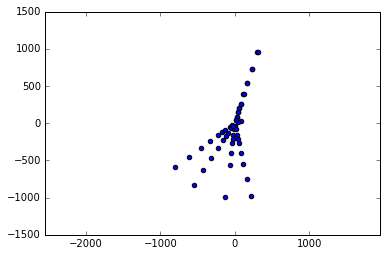

In [11]:
plt.scatter(pixelx,pixely)
plt.axis('equal')
plt.show()

This is what the algorithm will see.

#### Hits from a single particle

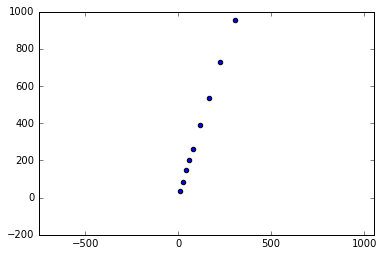

In [12]:
iparticle = 2
hits_particle = (particles == iparticle)
plt.scatter(pixelx[hits_particle],pixely[hits_particle])
plt.axis('equal')
plt.show()

So, ideally, our algorithm wants to assign specific ids to all hits in a way that corresponds to the particle. The perfect algorithm will split the event into various tracks:

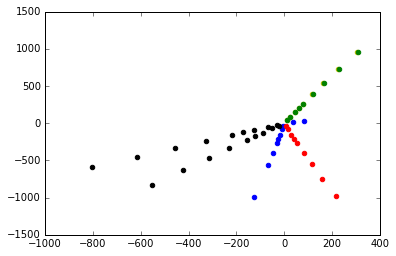

In [13]:
cmap = ['k','b','y','g','r','k','b']
for iparticle in np.unique(particles):
    hits_particle = (particles == iparticle)
    plt.scatter(pixelx[hits_particle],pixely[hits_particle],color=cmap[int(iparticle) % 7])
plt.show()

### Matching the hits together

Choose the tracking class that you want to use
(in the submission, it has to be derived from BaseEstimator and named Clusterer in clusterer.py)

In [25]:
from clusterer import Clusterer
tracker = Clusterer(0.8)

#### Training the algorithm

In [26]:
tracker.fit(X, y)

#### Running the algorithm to reconstruct the tracks in data
This will take some time to go through all events

In [27]:
y_true = y
y_predicted = tracker.predict_single_event(X_event)

Let's compare how well the tracks corresponds to the particles

In [28]:
df_result = pd.DataFrame({'particle':y_true[event_indices,1],'track':y_predicted}).sort_values(by='particle')
df_result

,particle,track
27,0,0
34,0,0
31,0,0
29,0,0
26,0,0
21,0,0
14,0,0
12,0,0
54,0,0
2,1,0


In [29]:
tracks = y_predicted

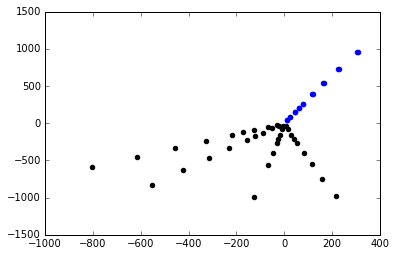

In [30]:
cmap = ['k','b','y','g','r']
for itrack in np.unique(tracks):
    if itrack >= 0:
        hits_track = (tracks == itrack)
        plt.scatter(pixelx[hits_track],pixely[hits_track],color=cmap[int(itrack) % 5])
plt.show()

Let's see which hits were not assigned to any cluster:

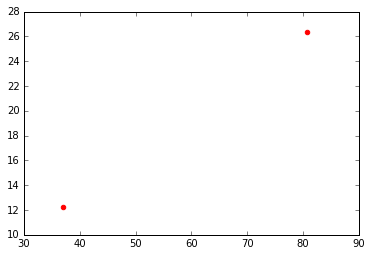

In [31]:
cmap = ['k','b','y','g','r']
itrack = -1
hits_track = (tracks == itrack)
plt.scatter(pixelx[hits_track],pixely[hits_track],color=cmap[int(itrack) % 5])
plt.show()

### Scoring the assignment

The score function measures the fraction of hits with good track assignment. More precisely, it is the overlap fraction between the true vs predicted cluster_id, averaged over all events. However, notice that the reconstruction algorithm has the freedom to label the indices in a way different than the true cluster_ids, therefore the "overlap" should be more clearly defined.

For this, we first determine a one-to-one matching between the true cluster_ids and predicted cluster_ids, particle-by-particle for a given event. For a given particle (defined by a single true cluster_id) the corresponding predicted cluster_id is the most frequent one among its hits. 

Once every particle is associated to a track in this way, we loop over to remove the duplicates, i.e. the tracks which contain the maximum hits of more than one particle. Among those particles, the particle with the most hits inside this track is considered to be the right match, and the other particles are considered to be lost.

After the above procedure, the well-associated hits in the event are counted, and their ratio to the total number of hits is determined as the efficiency of this event.

In the end, every event, regardless of its hit multiplicity, is considered equivalent and the efficiency is averaged over the events in the full sample.

The input to the score function is the true and predicted arrays of [event_id, cluster_id]. Note that in order for the scoring to function, the order of the hits in the predicted array must match exactly the same order in the input. If your algorithm reshuffles the order of the hits, make sure you save the original indices before doing that, and re-sort the result array corresponding to those indices.

In [32]:
def score_function(y_true, y_pred):
    '''Compute a clustering score.

    Cluster ids should be nonnegative integers. A negative integer
    will mean that the corresponding point does not belong to any
    cluster.

    We first identify assigned clusters by taking the max count of 
    unique assigned ids for each true cluster. We remove all unassigned
    clusters (all assigned ids are -1) and all duplicates (the same
    assigned id has majority in several true clusters) except the one
    with the largest count. We add the counts, then divide by the number
    of events. The score should be between 0 and 1. 

    Parameters
    ----------
    y_true : np.array, shape = (n, 2)
        The ground truth.
        first column: event_id
        second column: cluster_id
    y_pred : np.array, shape = (n, 2)
        The predicted cluster assignment.
        first column: event_id
        second column: predicted cluster_id
    """
    '''
    score = 0.
    event_ids = y_true[:, 0]
    y_true_cluster_ids = y_true[:, 1]
    y_pred_cluster_ids = y_pred

    unique_event_ids = np.unique(event_ids)
    for event_id in unique_event_ids:
        event_indices = (event_ids==event_id)
        cluster_ids_true = y_true_cluster_ids[event_indices]
        cluster_ids_pred = y_pred_cluster_ids[event_indices]

        unique_cluster_ids = np.unique(cluster_ids_true)
        n_cluster = len(unique_cluster_ids)
        n_sample = len(cluster_ids_true)

        # assigned_clusters[i] will be the predicted cluster id
        # we assign (by majority) to true cluster i 
        assigned_clusters = np.empty(n_cluster, dtype='int64')
        # true_positives[i] will be the number of points in 
        # predicted cluster[assigned_clusters[i]]
        true_positives = np.full(n_cluster, fill_value=0, dtype='int64')
        for i, cluster_id in enumerate(unique_cluster_ids):
            # true points belonging to a cluster
            true_points = cluster_ids_true[cluster_ids_true == cluster_id]
            # predicted points belonging to a cluster
            found_points = cluster_ids_pred[cluster_ids_true == cluster_id]
            # nonnegative cluster_ids (negative ones are unassigned)
            assigned_points = found_points[found_points >= 0]
            # the unique nonnegative predicted cluster ids on true_cluster[i]
            n_sub_cluster = len(np.unique(assigned_points))
            # We find the largest predicted cluster in the true cluster.
            if(n_sub_cluster > 0):
                # sizes of predicted assigned cluster in true cluster[i]
                predicted_cluster_sizes = np.bincount(
                    assigned_points.astype(dtype='int64'))
                # If there are ties, we assign the tre cluster to the predicted
                # cluster with the smallest id (combined behavior of np.unique
                # which sorts the ids and np.argmax which returns the first 
                # occurence of a tie).
                assigned_clusters[i] = np.argmax(predicted_cluster_sizes)
                true_positives[i] = len(
                    found_points[found_points == assigned_clusters[i]])
            # If none of the assigned ids are positive, the cluster is unassigned
            # and true_positive = 0
            else:
                assigned_clusters[i] = -1
                true_positives[i] = 0

        # resolve duplicates and count good assignments
        sorted = np.argsort(true_positives)
        true_positives_sorted = true_positives[sorted]
        assigned_clusters_sorted = assigned_clusters[sorted]
        good_clusters = assigned_clusters_sorted >= 0
        for i in range(len(assigned_clusters_sorted) - 1):
            assigned_cluster = assigned_clusters_sorted[i]
            # duplicates: only keep the last count (which is the largest
            # because of sorting)
            if assigned_cluster in assigned_clusters_sorted[i+1:]:
                good_clusters[i] = False
        n_good = np.sum(true_positives_sorted[good_clusters])
        score += 1. * n_good / n_sample
    score /= len(unique_event_ids)
    return score


Check the score of a single event:

In [33]:
y_pred = np.zeros((len(y_predicted),2))

y_pred[:,1] = y_predicted
y_pred[:,0] = [ievent] * len(y_predicted)

y_test_event = y[y[:,0]==ievent]

score_function(y_test_event,y_pred)

0.36363636363636365

## Cross-validation


It is important to be aware that when we split the dataset for cross-validation, we shuffle and split by the events (which correspond to many rows), not by rows. The function provided helps doing that. 

In [23]:
# We do a single fold because blending would not work anyway:
# mean of cluster_ids make no sense
def get_cv(y_train_array):
    unique_event_ids = np.unique(y_train_array[:, 0])
    event_cv = ShuffleSplit(
        n_splits=1, test_size=0.5, random_state=57)
    for train_event_is, test_event_is in event_cv.split(unique_event_ids):
        train_is = np.where(
            np.in1d(y_train_array[:, 0], unique_event_ids[train_event_is]))[0]
        test_is = np.where(
            np.in1d(y_train_array[:, 0], unique_event_ids[test_event_is]))[0]
        yield train_is, test_is

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>.
For this we provide a unit test. 
Place the python file <code>clusterer.py</code> and <code>user_test_model.py</code></a> in a directory, set the paths to the data files in <code>user_test_model.py</code>, and run:

<code>python user_test_model.py</code>

**If it runs and prints**   
<code>
Reading file ...
Training ...
Testing ...
score =  0.846205321725
</code>
**you can submit the code.**

You can also run the unit test from the notebook:

In [24]:
!python user_test_submission.py

Reading file ...
Training ...
Testing ...
score =  0.437960791624


You're now ready to implement your own algorithm. Enjoy tracking!